# **Submission Kelas Belajar Machine Learning untuk Pemula**
## **Nama : Febry Heri Setiyawan**
## **Kota Domisili : Kota Madiun, Jawa Timur**
## **Asal Instansi : Politeknik Negeri Madiun**
## **Email : stywanheri@gamil.com** 

In [1]:
# Mengimpor library yang diperlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Mengimpor set data yang disesuaikan dengan submission Dicoding Academy
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rock_paper_scissors.zip

--2020-11-01 02:57:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  9.72MB/s    in 36s     

2020-11-01 02:58:29 (8.53 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [3]:
# Ekstrak file dari zip dan dibagi berdasarkan tipe training dan validation
import zipfile,os
local_zip = "/tmp/rock_paper_scissors.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Hapus direktori 'rps-cv-images' dan semua isinya serta menghapus 'README_rpc-cv-images.txt'
# Karena kedua hal tersebut tidak perlu
import shutil
base_dir = '/tmp/rockpaperscissors'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS = 150, 150, 3
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range = 0.4,
    fill_mode = 'nearest',
    validation_split = 0.4
    )
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    color_mode = 'rgb',
    class_mode = 'sparse',
    shuffle = True,
    subset = 'training'
)
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    color_mode = 'rgb',
    class_mode = 'sparse',
    shuffle = True,
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [25]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, LeakyReLU
INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS)

# Inisialisasi model
cnn = models.Sequential()

# Convolutional layer bagian 1
cnn.add(Conv2D(32, (3,3), activation = 'relu', input_shape = INPUT_SHAPE))
cnn.add(Conv2D(32, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))

# Convolutional layer bagian 2
cnn.add(Conv2D(64,(3,3), activation = 'relu'))
cnn.add(Conv2D(64,(3,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))

# Convolutional layer bagian 3
cnn.add(Conv2D(128,(3,3), activation = 'relu'))
cnn.add(Conv2D(128,(3,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))

# Convolutional layer bagian 4
cnn.add(Conv2D(256,(3,3), activation = 'relu'))
cnn.add(MaxPooling2D(2,2))

# Lapisan terhubung sepenuhnya dan Lapisan Output
cnn.add(Flatten(input_shape = INPUT_SHAPE))
cnn.add(Dense(256, activation = LeakyReLU(alpha= 0.3)))
cnn.add(Dense(256, activation = LeakyReLU(alpha= 0.3)))
cnn.add(Dropout(0.5))
cnn.add(Dense(512, activation = LeakyReLU(alpha= 0.3)))
cnn.add(Dropout(0.3))
cnn.add(Dense(3, activation = "softmax"))

cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 128)      

In [19]:
# Memanggil kembali EarlyStopping dan History
from keras.callbacks import EarlyStopping, History

earlystop = EarlyStopping (monitor = 'val_loss', min_delta = 0, patience = 5)

history = History()

cnn.compile (loss = 'sparse_categorical_crossentropy',
             optimizer = tf.optimizers.Adam(),
             metrics = ['accuracy'])

# Batch yang disasarkan sesuai instruksi submission
cnn.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size,
    callbacks = [earlystop, history],
    verbose = 2
)

Epoch 1/20
41/41 - 15s - loss: 1.1036 - accuracy: 0.3300 - val_loss: 1.0977 - val_accuracy: 0.3426
Epoch 2/20
41/41 - 15s - loss: 1.0699 - accuracy: 0.3822 - val_loss: 0.8771 - val_accuracy: 0.6030
Epoch 3/20
41/41 - 15s - loss: 0.6855 - accuracy: 0.6966 - val_loss: 0.6839 - val_accuracy: 0.6956
Epoch 4/20
41/41 - 16s - loss: 0.5251 - accuracy: 0.7832 - val_loss: 0.4272 - val_accuracy: 0.8391
Epoch 5/20
41/41 - 15s - loss: 0.4804 - accuracy: 0.8167 - val_loss: 0.5201 - val_accuracy: 0.8264
Epoch 6/20
41/41 - 15s - loss: 0.3912 - accuracy: 0.8476 - val_loss: 0.5015 - val_accuracy: 0.8137
Epoch 7/20
41/41 - 15s - loss: 0.3937 - accuracy: 0.8541 - val_loss: 0.5483 - val_accuracy: 0.7778
Epoch 8/20
41/41 - 15s - loss: 0.3622 - accuracy: 0.8658 - val_loss: 0.3997 - val_accuracy: 0.8553
Epoch 9/20
41/41 - 15s - loss: 0.3438 - accuracy: 0.8549 - val_loss: 0.2983 - val_accuracy: 0.8831
Epoch 10/20
41/41 - 15s - loss: 0.3210 - accuracy: 0.8752 - val_loss: 0.2427 - val_accuracy: 0.9190
Epoch 11/

Saving 1vQCX4af6hQmuwxZ.png to 1vQCX4af6hQmuwxZ.png


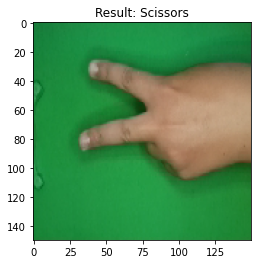

In [21]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Memprediksi gambar
  path = fn
  img = image.load_img(path, target_size = (IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  
  images = np.vstack([x])
  resultProb = cnn.predict(images)
  resultLabel = resultProb.argmax(axis = -1)

  #Mencetak hasil gambar sesuai class
  if resultLabel ==0:
    plt.title("Result: Paper")
  elif resultLabel ==1:
    plt.title("Result: Rock")
  elif resultLabel ==2:
    plt.title("Result: Scissors")